In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
z_pk = [200.0,100.0,75.0,50.0,10.0,5.0,0.0]
k_out = [0.0001,0.001, 0.01, 0.1,1]
z_init = 99.
cosmo = Class()
cosmo.set({'output':'mPk dTk lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'a_init_nbody': 1./(z_init+1.),
           'switch_radiation_source':1,
           'switch_gamma':1,
           'radiation_streaming_approximation':3,
           'ur_fluid_approximation':2,
           'l_max_g':100,
           'l_max_ur':100,
           'l_max_pol_g':100, 
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':60,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'P_k_max_h/Mpc' : 1.,
           'evolver':0,
           'tol_perturb_integration':0.000001,
           'tol_background_integration':1e-8,
           'back_integration_stepsize':1e-3,
           'perturb_sampling_stepsize':0.01,
           'tol_thermo_integration':1e-5
            })
cosmo.compute()

In [3]:
bg = cosmo.get_background()
print bg.viewkeys()

dict_keys(['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'H_prime', 'chi2', 'conf. time [Mpc]', '(.)rho_ur', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', 'gr.fac. D', 'gr.fac. f', 'chi1', 'z', 'sigma1', 'comov.snd.hrz.', 'sigma2'])


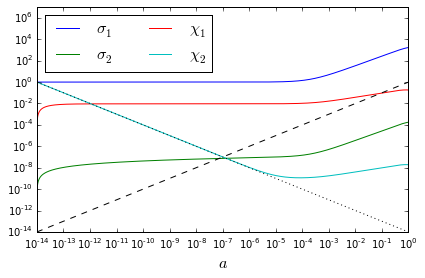

In [4]:
a = 1./(bg['z']+1)
sigma1 = bg['sigma1']
sigma2 = bg['sigma2']
chi1= bg['chi1']
chi2= bg['chi2']
plt.loglog(a,sigma1,a,sigma2,a,chi1,a,chi2)
plt.legend([r'$\sigma_1$',r'$\sigma_2$',r'$\chi_1$',r'$\chi_2$'],fontsize=16,ncol=2,loc='upper left')

plt.loglog(a,a,'k--')
plt.loglog(a,1e-14*a**-1,'k:')
plt.ylim([1e-14,1e7])
plt.xlabel(r'$a$',fontsize=16)
plt.tight_layout()
plt.savefig('sigmachi.pdf')

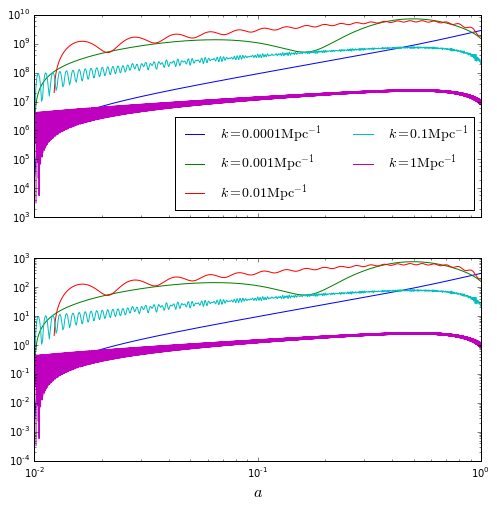

In [12]:
pt = cosmo.get_perturbations()
pts = pt['scalar']
f, [ax1, ax2] = plt.subplots(2,1,sharex=True,figsize=(8,8))
for idx, k in enumerate(k_out):
    pt = pts[idx]
    ax1.loglog(pt['a'],pt['CHT_chi'])
    ax2.loglog(pt['a'],-pt['CHT_sigma'])

ax1.legend(['$k = '+str(kk)+r'\mathrm{Mpc}^{-1}$' for kk in k_out], fontsize=14,loc='lower right',ncol=2)
ax2.set_xlim([1e-2,1e0])
ax2.set_xlabel(r'$a$',fontsize=16)

/Users/thomas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide


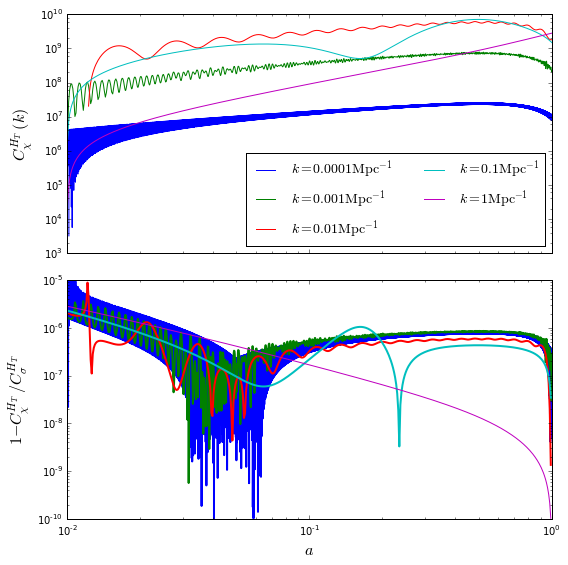

In [31]:
pt = cosmo.get_perturbations()
pts = pt['scalar']
f, [ax1, ax2] = plt.subplots(2,1,sharex=True,figsize=(8,8))
for idx, k in reversed(list(enumerate(k_out))):
    pt = pts[idx]
    if idx==0:
        lw = 1
    else:
        lw=2
    ax1.loglog(pt['a'],pt['CHT_chi'])
    scale = -pt['CHT_chi'][-1]/pt['CHT_sigma'][-1]
    ax2.loglog(pt['a'],np.abs(1-pt['CHT_chi']/(-pt['CHT_sigma'])/scale),lw=lw)

ax1.legend(['$k = '+str(kk)+r'\mathrm{Mpc}^{-1}$' for kk in k_out], fontsize=14,loc='lower right',ncol=2)
ax2.set_xlim([1e-2,1e0])
ax2.set_ylim([1e-10,1e-5])
ax2.set_xlabel(r'$a$',fontsize=16)
ax1.set_ylabel(r'$C^{H_T}_\chi(k)$',fontsize=16)
ax2.set_ylabel(r'$1-C^{H_T}_\chi/C^{H_T}_\sigma$',fontsize=16)
f.tight_layout()
f.savefig('CHT_sigmachi.pdf')

In [32]:
print scale

9526276.35871
